## Normalizacion

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

plt.rcParams["figure.figsize"] = (10,8) 

pd.options.display.max_columns=None
pd.options.display.float_format = '{:.2f}'.format 
np.set_printoptions(suppress=True)

Cargamos el dataframe creado en asunciones.

In [33]:
df = pd.read_csv('../Datos/vinos_asunciones.csv', index_col = 0)
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino
0,5524,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982
1,2174,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16


`En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:`


Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


`Manualmente`

In [34]:
# vamos a crear distintas variables con los estadísticos que necesitamos de nuestra variable respuesta

media = df["mntwines"].mean()
maximo = df["mntwines"].max() 
minimo = df["mntwines"].min()

In [35]:
# vamos a crearnos una columna nueva con el resultado de la normalización

df["mnt_norm"] = (df["mntwines"] - media) / (maximo - minimo )

In [36]:
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mnt_norm
0,5524,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982,0.22
1,2174,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16,-0.20


In [37]:
#Comprobamos el mínimo 
df['mnt_norm'].min()

-0.20357382068701563

In [38]:
#Comprobamos el máximo
df['mnt_norm'].max()

0.7964261793129844

Graficamos la comparación entre nuestra variable respuesta y la misma pero normalizada.

/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


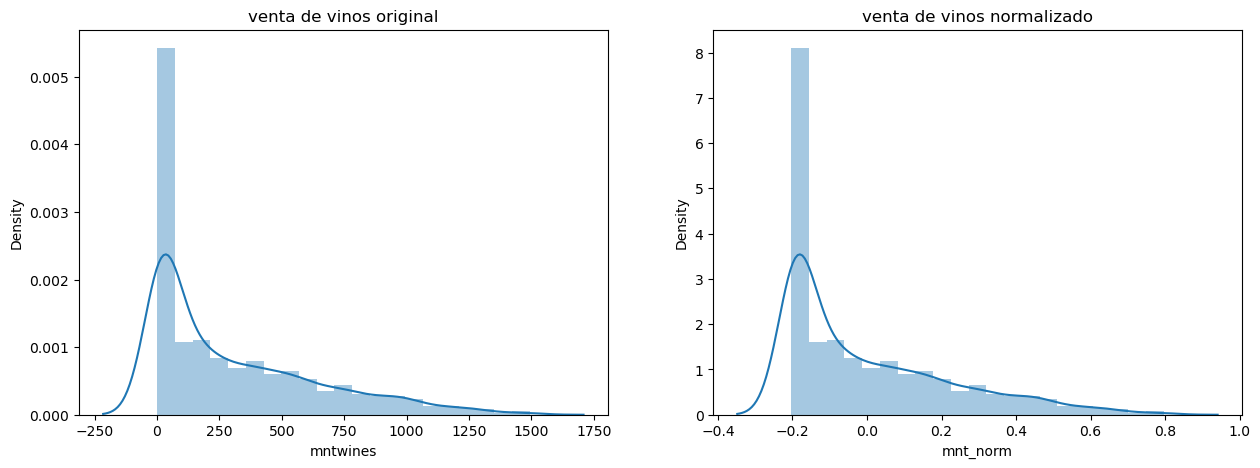

In [39]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('venta de vinos original')
axes[1].set_title('venta de vinos normalizado')

sns.distplot(df['mntwines'] ,ax = axes[0])
sns.distplot(df["mnt_norm"], ax = axes[1]);

In [40]:
stats.shapiro(df["mnt_norm"])

ShapiroResult(statistic=0.8381438255310059, pvalue=5.7032847498020055e-43)

Podemos observar que no hay mucha diferencia entre ambas, por lo que intentaremos con otro método.

`Logarítmica`

Aplicamos la lambda para normalización logarítmica, generando una nueva columna con dichos datos.

In [41]:
df["mnt_wines_log"] = df["mntwines"].apply(lambda x: np.log(x) if x > 0 else 0)

Comparamos la columna nueva con nuestra columna original para comprobar si hubo cambios.

/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


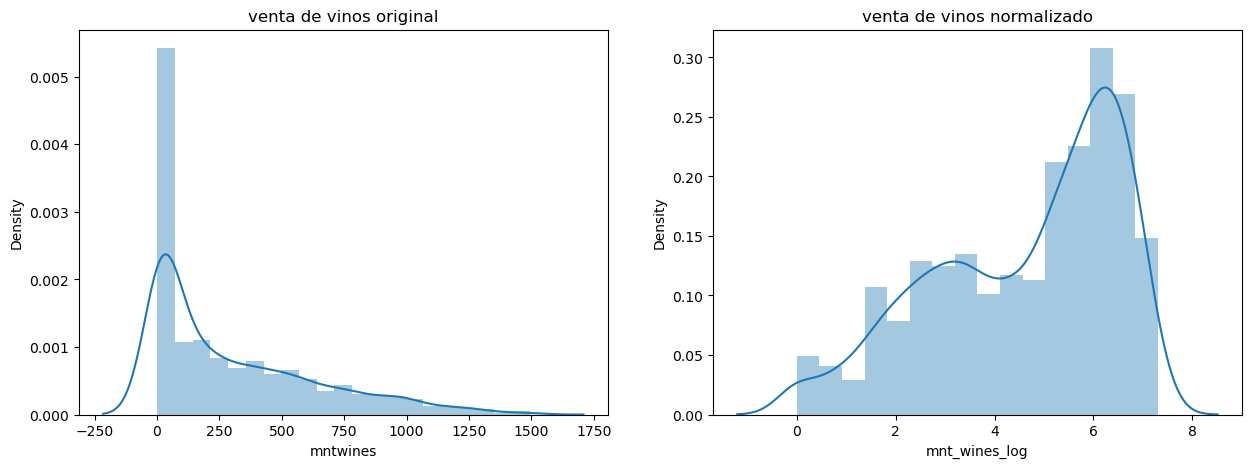

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('venta de vinos original')
axes[1].set_title('venta de vinos normalizado')

sns.distplot(df["mntwines"] ,ax = axes[0])
sns.distplot(df["mnt_wines_log"], ax = axes[1]);

Se prueba con el test de Shapiro.

In [43]:
stats.shapiro(df["mnt_wines_log"])

ShapiroResult(statistic=0.926708459854126, pvalue=9.30169208778134e-32)

Podemos obervar que ha mejorado la distribución pero aún no se acerca a ser una campana de Gauss

`Raíz cuadrada`

Aplicamos una lambda para normalizar la columna mntwines, con el método raiz cuadrada, generando una nueva columna 'mnt_wines_raiz'.

In [44]:
df["mnt_wines_raiz"] = df["mntwines"].apply(lambda x: math.sqrt(x))

Graficamos para verificar alguna diferencia entre ambas.

/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


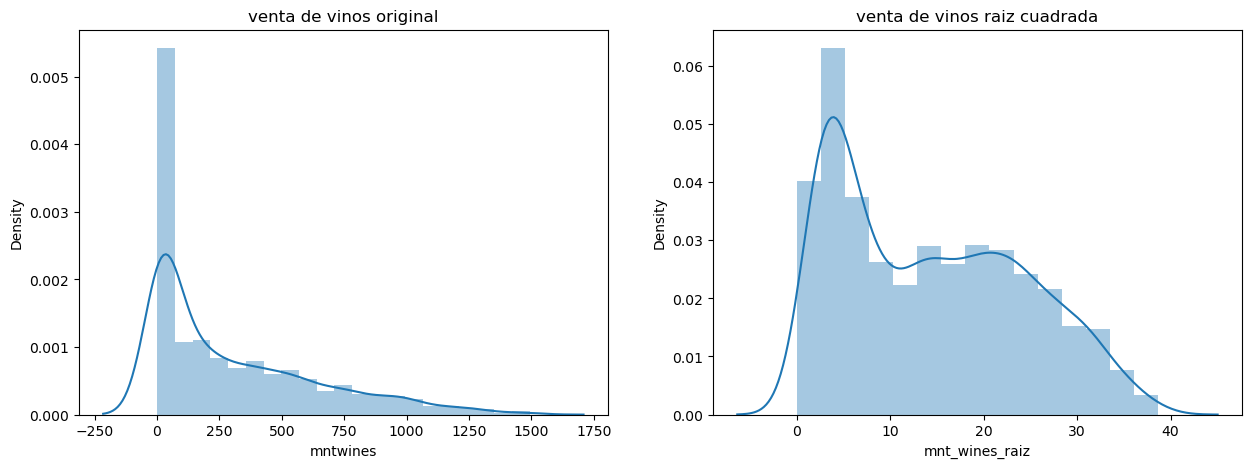

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('venta de vinos original')
axes[1].set_title('venta de vinos raiz cuadrada')

sns.distplot(df["mntwines"] ,ax = axes[0])
sns.distplot(df["mnt_wines_raiz"], ax = axes[1]);

Realizamos un test de Shapiro

In [46]:
stats.shapiro(df["mnt_wines_raiz"])

ShapiroResult(statistic=0.9346004724502563, pvalue=2.7264316291051187e-30)

Hasta ahora el mejor método de normalización para nuestros datos ha sido Raíz Cuadrada.

`stats.boxcox()`

Debido a que nuestros datos contienen valores 0, aplicamos una lambda para convertirlos a 1e-08 y poder aplicar efectivamente el método Boxcox

In [47]:
df["mntwines_sin_cero"] = df["mntwines"].apply(lambda x: (10**-8) if x == 0 else x)

In [48]:
df.head(10)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mnt_norm,mnt_wines_log,mnt_wines_raiz,mntwines_sin_cero
0,5524,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982,0.22,6.45,25.20,635.00
1,2174,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16,-0.20,2.40,3.32,11.00
2,4141,1965,Graduation,Together,71613.00,0,0,26,426,49,127,111,21,42,1,8,2,10,4,350,0.08,6.05,20.64,426.00
3,6182,1984,Graduation,Together,26646.00,1,0,26,11,4,20,10,3,5,2,2,0,4,6,42,-0.20,2.40,3.32,11.00
4,5324,1981,PhD,Married,58293.00,1,0,94,173,43,118,46,27,15,5,5,3,6,5,249,-0.09,5.15,13.15,173.00
5,7446,1967,Master,Together,62513.00,0,1,16,520,42,98,0,42,14,2,6,4,10,6,196,0.14,6.25,22.80,520.00
6,965,1971,Graduation,Divorced,55635.00,0,1,34,235,65,164,50,49,27,4,7,3,7,6,355,-0.05,5.46,15.33,235.00
7,6177,1985,PhD,Married,33454.00,1,0,32,76,10,56,3,1,23,2,4,0,4,8,93,-0.15,4.33,8.72,76.00
8,4855,1974,PhD,Together,30351.00,1,0,19,14,0,24,3,3,2,1,3,0,2,9,32,-0.19,2.64,3.74,14.00
9,5899,1950,PhD,Together,5648.00,1,1,68,28,0,6,1,1,13,1,1,0,0,20,21,-0.18,3.33,5.29,28.00


Comprobamos ahora el valor mínimo de la columna transformada

In [49]:
df['mntwines_sin_cero'].min()

1e-08

Procedemos a aplicar el método

In [50]:
df['mnt_wines_box'], lambda_ajustada = stats.boxcox(df['mntwines_sin_cero'])

/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


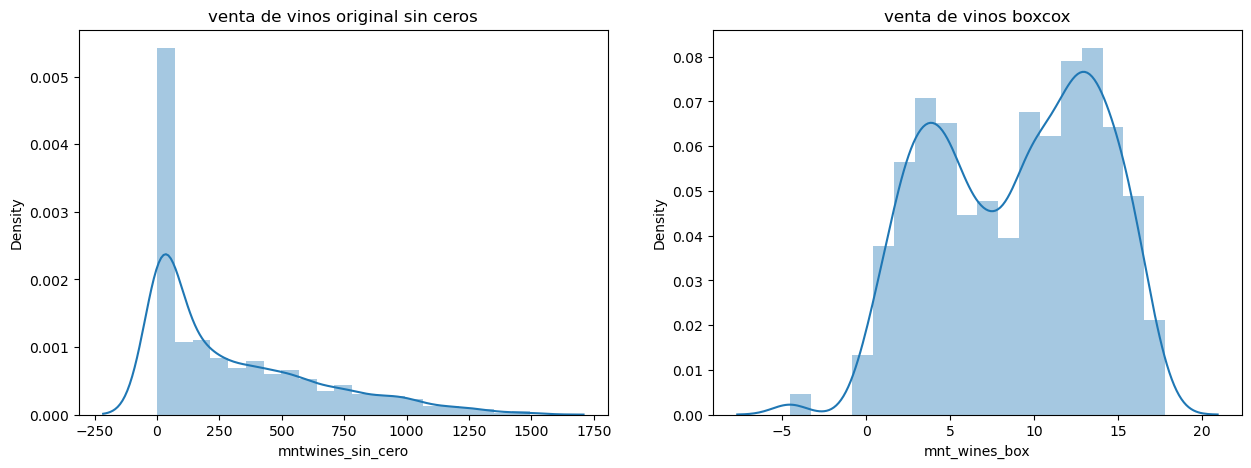

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('venta de vinos original sin ceros')
axes[1].set_title('venta de vinos boxcox')

sns.distplot(df["mntwines_sin_cero"] ,ax = axes[0])
sns.distplot(df["mnt_wines_box"], ax = axes[1]);

In [52]:
stats.shapiro(df['mnt_wines_box'])

ShapiroResult(statistic=0.9591224789619446, pvalue=1.2620104070569383e-24)

Podemos observar que el método Boxcox es el que mejores resultados nos ha dado hasta el momento para acercarnos a la campana de Gauss

`MinMaxScaler`

In [53]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [54]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['mntwines']])

MinMaxScaler()

In [55]:
# transformamos los datos
X_normalizadas = minmax.transform(df[["mntwines"]])

In [56]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["mnt_wines_Sklearn"])
numericas_minmax.head(2)

,mnt_wines_Sklearn
0,0.43
1,0.01


In [57]:
# incorporamos la columna al dataframe 

df["mnt_wines_Sklearn"] = numericas_minmax
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mnt_norm,mnt_wines_log,mnt_wines_raiz,mntwines_sin_cero,mnt_wines_box,mnt_wines_Sklearn
0,5524,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982,0.22,6.45,25.20,635.00,14.03,0.43
1,2174,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16,-0.20,2.40,3.32,11.00,3.14,0.01


/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliciano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


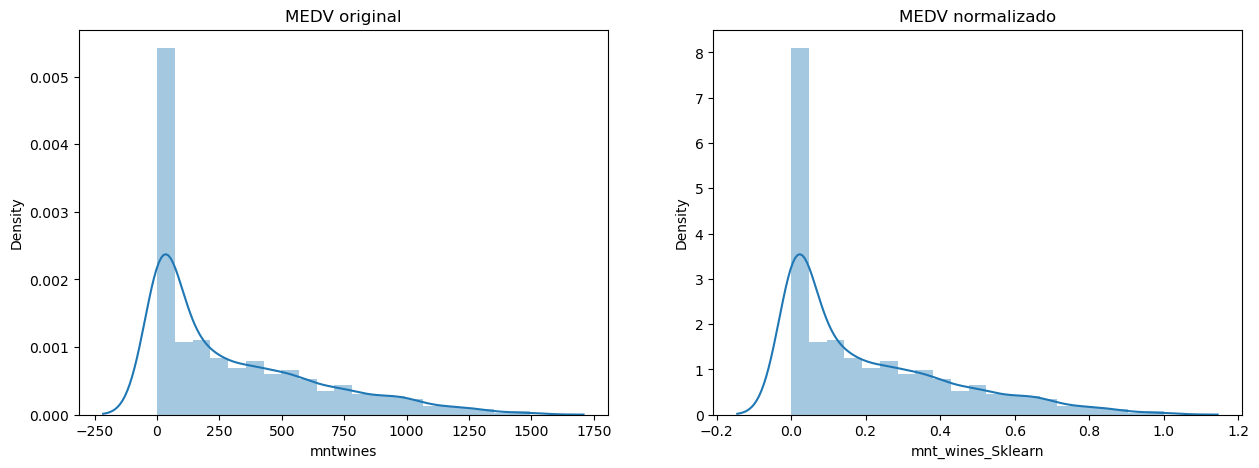

In [58]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('MEDV original')
axes[1].set_title('MEDV normalizado')

sns.distplot(df['mntwines'] ,ax = axes[0])
sns.distplot(df['mnt_wines_Sklearn'], ax = axes[1]);

Podemos observar que éste método no cambia la forma de nuestra gráfica, es decir no nos aporta grandes cambios en nuestros resultados.

In [59]:
df.head(2)

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,mnt_total_sin_vino,mnt_norm,mnt_wines_log,mnt_wines_raiz,mntwines_sin_cero,mnt_wines_box,mnt_wines_Sklearn
0,5524,1957,Graduation,Single,58138.00,0,0,58,635,88,546,172,88,88,3,8,10,4,7,982,0.22,6.45,25.20,635.00,14.03,0.43
1,2174,1954,Graduation,Single,46344.00,1,1,38,11,1,6,2,1,6,2,1,1,2,5,16,-0.20,2.40,3.32,11.00,3.14,0.01


Eliminamos las columnas que agregamos que no nos funcionaron y  nos quedamos con la columna del método boxcox

In [60]:
df.drop(['mnt_norm', 'mnt_wines_log', 'mnt_wines_raiz', 'mnt_wines_Sklearn'], axis = 1, inplace = True)

Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [61]:
df.to_csv("../Datos/vinos_norm.csv")